In [2]:
from pathlib import Path

import anndata
import scanpy as sc
import pandas as pd
import seaborn as sns

import pollock
from pollock.models.model import PollockDataset, PollockModel, load_from_directory

specify which module to use for cell type predictions

In [3]:
module_filepath = '/models/snCCRCC_immune_annotated_v0.1.0'

download adata object here

it is also the same anndata object create here

In [4]:
adata = sc.read_h5ad('/data/single_cell_classification/tumor/gbm/gbm.h5ad')
adata

AnnData object with n_obs × n_vars = 111979 × 29032
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'sample', 'ident', 'cell_type', 'cell_type_short', 'cell_type_detailed', 'sample_id'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable'
    obsm: 'X_pca', 'X_umap'
    layers: 'logcounts'

In [ ]:
# set(adata.X[:10].toarray().flatten())

create a new anndata object where raw counts are stored in .X

In [1]:
# prediction_adata = adata

create PollockDataset and load in module

In [5]:
loaded_pds, loaded_pm = load_from_directory(adata, module_filepath)

2020-07-15 20:24:05,198 normalizing counts for prediction
2020-07-15 20:24:05,199 filtering for genes in training set
2020-07-15 20:24:05,214 4506 genes in training set are missing from prediction set
/miniconda/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
2020-07-15 20:24:17,063 scaling data


predict cell types

returns cell type labels, probability for the given cell type labels, and the probabilities of all cell types

In [7]:
labels, probs, cell_type_probs = loaded_pm.predict_pollock_dataset(loaded_pds, labels=True, )

df = pd.DataFrame.from_dict({
    'predicted_cell_type': labels,
    'cell_type_probability': probs,
})
df.index = adata.obs.index
df = pd.concat((df, pd.DataFrame(data=cell_type_probs, index=adata.obs.index,
                            columns=[f'probability_{c}' for c in loaded_pds.cell_types])), axis=1)
df

,predicted_cell_type,cell_type_probability,probability_B-cells,probability_Basophils,probability_CD4 CTL,probability_CD4 T-cells,probability_CD4 T-cells activated,probability_CD4 T-cells naive,probability_CD4/CD8 proliferating,probability_CD8 CTL,...,probability_Myofibroblasts,probability_NK cells strong,probability_NK cells weak,probability_Normal epithelial cells,probability_Plasma,probability_TRM,probability_Tregs,probability_Tumor cells,probability_cDC,probability_pDC
index,,,,,,,,,,,,,,,,,,,,,
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGCCACTCG,Fibroblasts,0.33,0.02,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.31,0.00,0.00,0.10,0.01,0.00,0.00,0.07,0.02,0.01
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGTGAATAC,Myofibroblasts,0.52,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.52,0.00,0.00,0.09,0.02,0.00,0.00,0.11,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGAACT,Fibroblasts,0.23,0.00,0.03,0.0,0.01,0.00,0.00,0.01,0.0,...,0.23,0.00,0.02,0.05,0.04,0.04,0.01,0.05,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGTTCC,Myofibroblasts,0.50,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.50,0.00,0.00,0.21,0.02,0.00,0.00,0.09,0.00,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCAGTCCTGTTC,Macrophages,0.88,0.00,0.02,0.0,0.00,0.00,0.00,0.00,0.0,...,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTAACATGA,Tumor cells,0.35,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.25,0.03,0.01,0.06,0.07,0.00,0.01,0.35,0.00,0.00
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTCATCACA,Myofibroblasts,0.40,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.40,0.01,0.01,0.06,0.06,0.00,0.00,0.14,0.01,0.01
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTTCTGACA,Fibroblasts,0.36,0.00,0.02,0.0,0.00,0.04,0.00,0.01,0.0,...,0.14,0.00,0.00,0.07,0.02,0.01,0.02,0.01,0.02,0.00


In [8]:
adata.obs = pd.merge(adata.obs, df, left_index=True, right_index=True)
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,sample,ident,...,probability_Myofibroblasts,probability_NK cells strong,probability_NK cells weak,probability_Normal epithelial cells,probability_Plasma,probability_TRM,probability_Tregs,probability_Tumor cells,probability_cDC,probability_pDC
index,,,,,,,,,,,,,,,,,,,,,
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGCCACTCG,C3L-03405_CPT0224600013_2019-12-20,1284.0,932,0.004673,2850.0,990,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.31,0.00,0.00,0.10,0.01,0.00,0.00,0.07,0.02,0.01
C3L-03405_CPT0224600013_2019-12-20_AAACCCAAGTGAATAC,C3L-03405_CPT0224600013_2019-12-20,32825.0,5934,0.001401,4050.0,1991,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.52,0.00,0.00,0.09,0.02,0.00,0.00,0.11,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGAACT,C3L-03405_CPT0224600013_2019-12-20,1297.0,874,0.044719,2814.0,924,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.23,0.00,0.02,0.05,0.04,0.04,0.01,0.05,0.01,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCACATCGTTCC,C3L-03405_CPT0224600013_2019-12-20,15036.0,4006,0.001264,4174.0,2046,12,12,C3L-03405_CPT0224600013_2019-12-20,12,...,0.50,0.00,0.00,0.21,0.02,0.00,0.00,0.09,0.00,0.00
C3L-03405_CPT0224600013_2019-12-20_AAACCCAGTCCTGTTC,C3L-03405_CPT0224600013_2019-12-20,1585.0,1060,0.013249,3061.0,1068,1,1,C3L-03405_CPT0224600013_2019-12-20,1,...,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTAACATGA,C3N-03188_CPT0207030018_2019-11-13,10309.0,3952,0.000970,4210.0,2507,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.25,0.03,0.01,0.06,0.07,0.00,0.01,0.35,0.00,0.00
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTCATCACA,C3N-03188_CPT0207030018_2019-11-13,10783.0,4335,0.001577,4203.0,2671,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.40,0.01,0.01,0.06,0.06,0.00,0.00,0.14,0.01,0.01
C3N-03188_CPT0207030018_2019-11-13_TTTGTTGGTTCTGACA,C3N-03188_CPT0207030018_2019-11-13,9852.0,3549,0.000914,4483.0,2514,3,3,C3N-03188_CPT0207030018_2019-11-13,3,...,0.14,0.00,0.00,0.07,0.02,0.01,0.02,0.01,0.02,0.00


In [9]:
list(adata.obs.columns)

['orig.ident',
 'nCount_RNA',
 'nFeature_RNA',
 'percent.mito',
 'nCount_SCT',
 'nFeature_SCT',
 'SCT_snn_res.0.5',
 'seurat_clusters',
 'sample',
 'ident',
 'cell_type',
 'cell_type_short',
 'cell_type_detailed',
 'sample_id',
 'predicted_cell_type',
 'cell_type_probability',
 'probability_B-cells',
 'probability_Basophils',
 'probability_CD4 CTL',
 'probability_CD4 T-cells',
 'probability_CD4 T-cells activated',
 'probability_CD4 T-cells naive',
 'probability_CD4/CD8 proliferating',
 'probability_CD8 CTL',
 'probability_CD8 CTL exhausted',
 'probability_CD8 T-cells preexhausted',
 'probability_Endothelial cells',
 'probability_Fibroblasts',
 'probability_Macrophages',
 'probability_Macrophages proliferating',
 'probability_Myofibroblasts',
 'probability_NK cells strong',
 'probability_NK cells weak',
 'probability_Normal epithelial cells',
 'probability_Plasma',
 'probability_TRM',
 'probability_Tregs',
 'probability_Tumor cells',
 'probability_cDC',
 'probability_pDC']

In [13]:
adata.obs['annotated_cell_type'] = adata.obs['cell_type'].to_list()

... storing 'predicted_cell_type' as categorical
... storing 'annotated_cell_type' as categorical


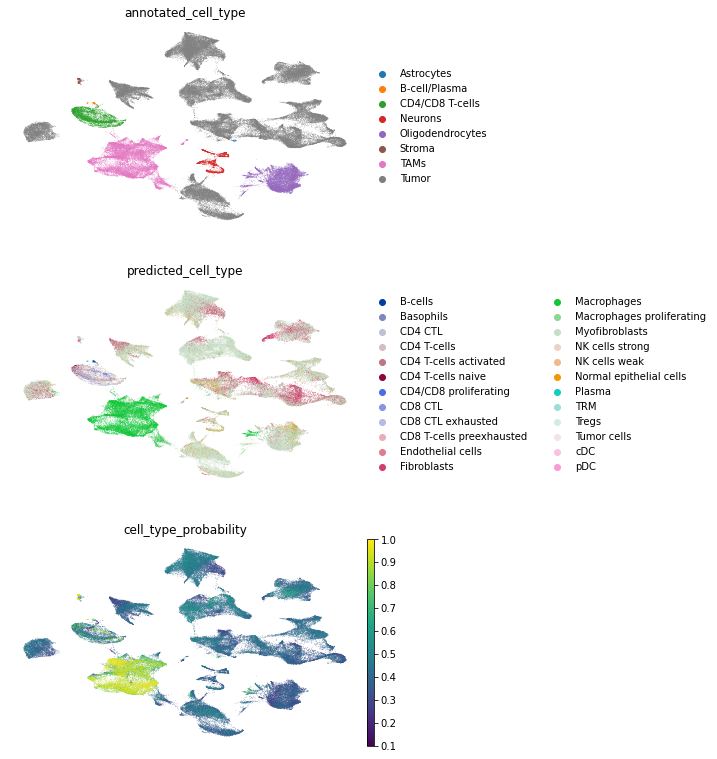

In [14]:
sc.pl.umap(adata, color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)

Trying to set attribute `.uns` of view, copying.


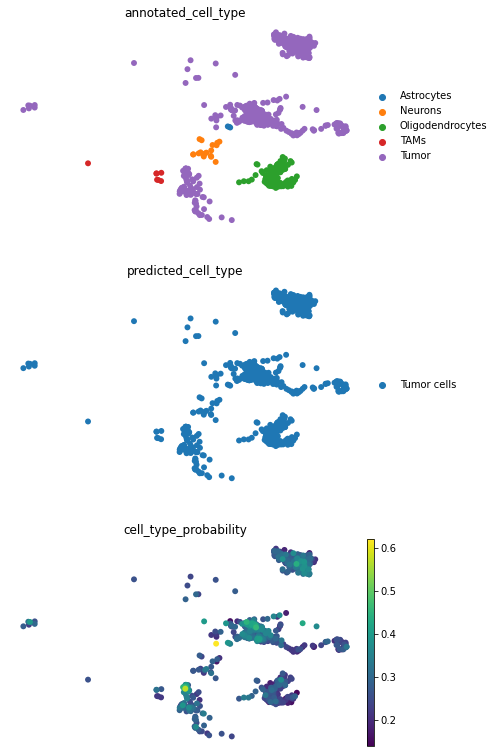

In [16]:
sc.pl.umap(adata[adata.obs['predicted_cell_type']=='Tumor cells'],
           color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)

## visualization of cell embeddings

with pollock we can also visualize the latent space created by the BVAE

here we take the emb

In [17]:
cell_embeddings = loaded_pm.get_cell_embeddings(loaded_pds.prediction_ds)
cell_embeddings.shape, cell_embeddings

((111979, 25),
 array([[ 0.98039347,  2.7542589 , -1.0889994 , ...,  0.72778857,
          1.8378283 , -1.6953291 ],
        [ 1.503201  ,  3.1991587 , -2.4832046 , ...,  1.2055963 ,
          2.1927369 , -1.2499666 ],
        [ 1.2386451 ,  2.2878187 , -0.9554652 , ...,  0.62425596,
          1.6185191 , -1.557765  ],
        ...,
        [ 2.806671  ,  2.2593572 , -1.1949998 , ...,  0.12303757,
          3.1691365 , -1.6021174 ],
        [ 2.905106  ,  2.734741  , -1.4736025 , ...,  2.1562428 ,
          2.3219454 , -1.6718687 ],
        [ 1.3186235 ,  1.4023527 , -1.4466987 , ...,  0.8763231 ,
          1.5002644 , -0.6170244 ]], dtype=float32))

In [18]:
adata.obsm['cell_embeddings'] = cell_embeddings

replace pca generated nearest neighbor and umap with cell embedding generated one

In [19]:
sc.pp.neighbors(adata, use_rep='cell_embeddings')
sc.tl.umap(adata)

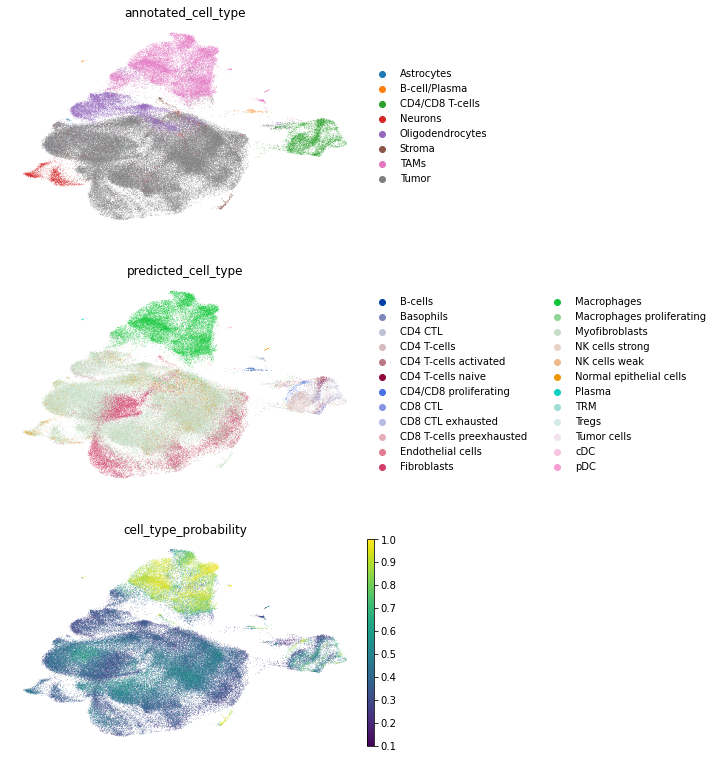

In [20]:
sc.pl.umap(adata, color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)

Trying to set attribute `.uns` of view, copying.


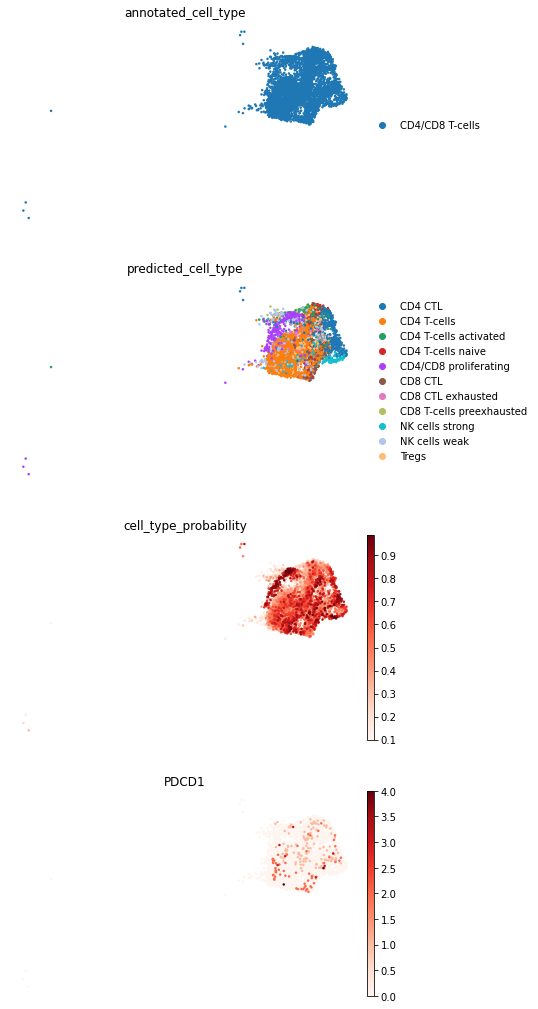

In [41]:
filtered = adata[adata.obs['annotated_cell_type']=='CD4/CD8 T-cells']
mask = [True if 'CD' in ct or 'Treg' in ct or 'NK' in ct else False
       for ct in filtered.obs['predicted_cell_type']]
filtered = filtered[mask]

sc.pl.umap(filtered,
           color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability',
                 'PDCD1'], color_map='Reds',
          frameon=False, ncols=1)

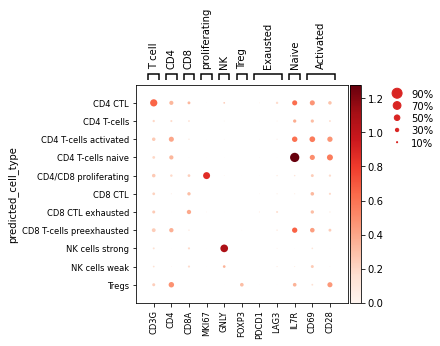

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[3.8499999999999996, 0, 0.2, 0.5, 0.25])

In [45]:
marker_map = {
    'T cell': ['CD3G'],
    'CD4': ['CD4'],
    'CD8': ['CD8A'],
    'proliferating': ['MKI67'],
    'NK': ['GNLY'],
    'Treg': ['FOXP3'],
    'Exausted': ['PDCD1', 'LAG3'],
    'Naive': ['IL7R'],
    'Activated': ['CD69', 'CD28']
}

sc.pl.dotplot(filtered, var_names=marker_map, log=True,
              groupby='predicted_cell_type')

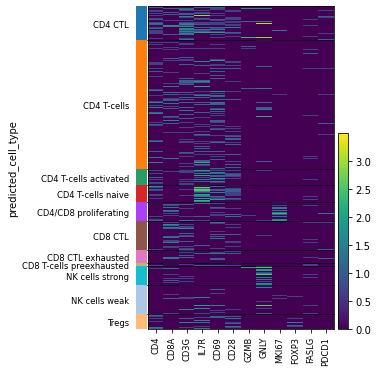

GridSpec(2, 4, height_ratios=[0, 6], width_ratios=[0.2, 3.5999999999999996, 0, 0.2])

In [43]:
sc.pl.heatmap(filtered, var_names=['CD4', 'CD8A', 'CD3G', 'IL7R', 'CD69', 'CD28', 'GZMB', 'GNLY', 'MKI67', 'FOXP3',
                                  'FASLG', 'PDCD1'],
              groupby='predicted_cell_type', log=True)

Trying to set attribute `.uns` of view, copying.


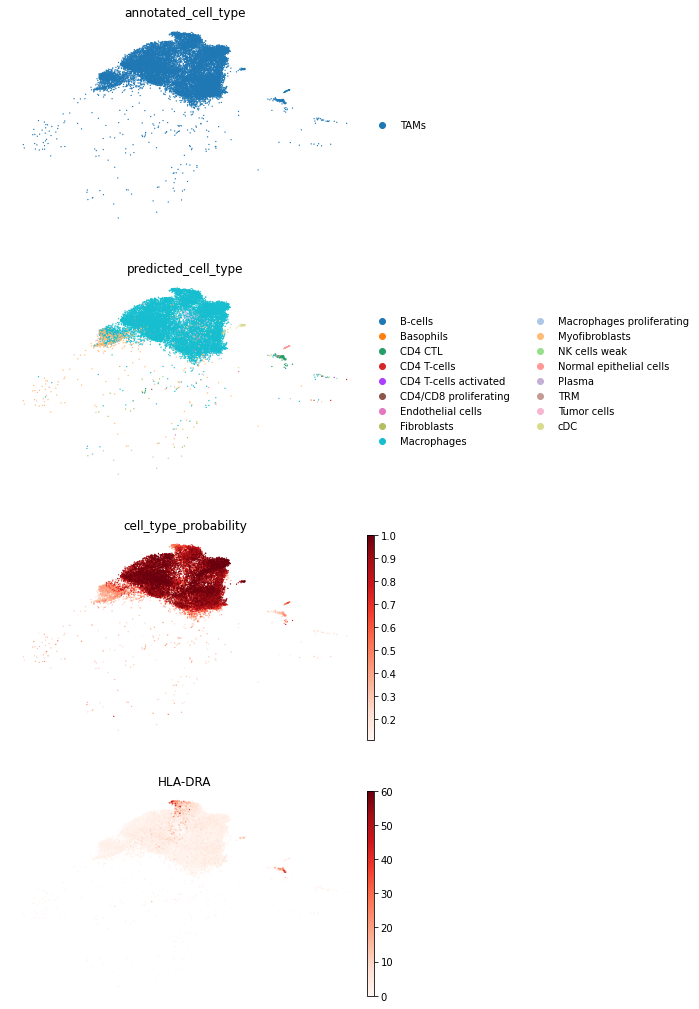

In [25]:
sc.pl.umap(adata[adata.obs['annotated_cell_type']=='TAMs'],
           color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability',
                 'HLA-DRA'], color_map='Reds',
          frameon=False, ncols=1)

In [22]:
adata[adata.obs['annotated_cell_type']=='TAM']

View of AnnData object with n_obs × n_vars = 0 × 29032
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'sample', 'ident', 'cell_type', 'cell_type_short', 'cell_type_detailed', 'sample_id', 'predicted_cell_type', 'cell_type_probability', 'probability_B-cells', 'probability_Basophils', 'probability_CD4 CTL', 'probability_CD4 T-cells', 'probability_CD4 T-cells activated', 'probability_CD4 T-cells naive', 'probability_CD4/CD8 proliferating', 'probability_CD8 CTL', 'probability_CD8 CTL exhausted', 'probability_CD8 T-cells preexhausted', 'probability_Endothelial cells', 'probability_Fibroblasts', 'probability_Macrophages', 'probability_Macrophages proliferating', 'probability_Myofibroblasts', 'probability_NK cells strong', 'probability_NK cells weak', 'probability_Normal epithelial cells', 'probability_Plasma', 'probability_TRM', 'probability_Tregs', 'probability_Tumor cells', 'probability_cDC', 'probabi